<a href="https://colab.research.google.com/github/HanaAdzania/NYOBA-TUGAS-2-CLUSTERING/blob/main/Salinan_dari_NYOBA_UPLOAD_GITHUB_TUGAS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msnum

In [ ]:
#Mengupload data, dimana filenya ada separator titik koma
df1 = pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/NYOBA-TUGAS-2-CLUSTERING/main/bisa.csv',low_memory = False, encoding='utf8',sep=";")

In [ ]:
#Ingin dilihat tampilan data terlebih dahulu
df1

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1,Sabtu,2
1,102,Wanita,32,"Rp3,606,557",86,1,Depok,1,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,0,Tangerang,2,Minggu,3
3,111,Wanita,31,"Rp11,475,409",54,1,Jakarta,-,Senin,6
4,112,Pria,36,"Rp22,508,196",92,1,Depok,0,Jumat,0


In [ ]:
#melihat informasi data--> termasuk tipe datanya
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    5 non-null      int64 
 1   Jenis Kelamin         5 non-null      object
 2   Umur                  5 non-null      int64 
 3   Pendapatan-per-bulan  5 non-null      object
 4   skor-pengeluaran      5 non-null      int64 
 5   Menikah               5 non-null      int64 
 6   Kota                  5 non-null      object
 7   Promo                 5 non-null      object
 8   HariFav               5 non-null      object
 9   FavFlavor             5 non-null      int64 
dtypes: int64(5), object(5)
memory usage: 528.0+ bytes


In [ ]:
df1.describe()

,ID,Umur,skor-pengeluaran,Menikah,FavFlavor
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,105.800000,39.800000,65.000000,0.800000,3.400000
std,5.263079,9.523655,22.561028,0.447214,2.607681
min,101.000000,31.000000,41.000000,0.000000,0.000000
25%,102.000000,32.000000,52.000000,1.000000,2.000000
50%,103.000000,36.000000,54.000000,1.000000,3.000000
75%,111.000000,49.000000,86.000000,1.000000,6.000000
max,112.000000,51.000000,92.000000,1.000000,6.000000


In [ ]:
#Mengupload data dimana datanya separator pemisahanya koma aja
df = pd.read_csv('https://raw.githubusercontent.com/HanaAdzania/NYOBA-TUGAS-2-CLUSTERING/main/Coba%20Upload%20File%20Excel%20Github.csv',low_memory = False, encoding='utf8')

In [ ]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,102,Wanita,32,3606557,86,1,Depok,1,Minggu,6
2,103,Pria,51,15983606,41,0,Tangerang,2,Minggu,3
3,111,Wanita,31,11475409,54,1,Jakarta,-,Senin,6
4,112,Pria,36,22508196,92,1,Depok,0,Jumat,0


In [ ]:
df.tail(3)#melihat dari data yang bawah, memastikan ID hanya berupa angka urutan saja

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
2,103,Pria,51,15983606,41,0,Tangerang,2,Minggu,3
3,111,Wanita,31,11475409,54,1,Jakarta,-,Senin,6
4,112,Pria,36,22508196,92,1,Depok,0,Jumat,0


In [ ]:
df.shape

(5, 10)

In [ ]:
df.columns

Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

In [ ]:
#Menghapus kolom ID, karena tidak diperlukan dalam analisis (hanya berupa index yang berisikan angka urutan kapan customer melakukan pendaftaran loyality program)
df.drop("ID",axis=1,inplace=True)
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,3606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,0,Tangerang,2,Minggu,3
3,Wanita,31,11475409,54,1,Jakarta,-,Senin,6
4,Pria,36,22508196,92,1,Depok,0,Jumat,0


## Mengoreksi Tipe Variabel

Akan diperiksa tipe data tiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Jenis Kelamin         5 non-null      object
 1   Umur                  5 non-null      int64 
 2   Pendapatan-per-bulan  5 non-null      int64 
 3   skor-pengeluaran      5 non-null      int64 
 4   Menikah               5 non-null      int64 
 5   Kota                  5 non-null      object
 6   Promo                 5 non-null      object
 7   HariFav               5 non-null      object
 8   FavFlavor             5 non-null      int64 
dtypes: int64(5), object(4)
memory usage: 488.0+ bytes


dikarenakan..... disini bisa ngomongin ttg tipe variabel yg slaaah
dan ada nggaa missing valuenyaa

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype('int64') #pendapatan perbulan itu tipe datanya apa ya? atau float64?
df['Menikah']=df['Menikah'].astype('category')
df['Kota']=df['Kota'].astype('category')
df['Promo']=df['Promo'].astype('category')
df['HariFav']=df['HariFav'].astype('category')
df['FavFlavor']=df['FavFlavor'].astype('category')
df.dtypes

Jenis Kelamin           category
Umur                       int64
Pendapatan-per-bulan       int64
skor-pengeluaran           int64
Menikah                 category
Kota                    category
Promo                   category
HariFav                 category
FavFlavor               category
dtype: object

## Statistika Deskriptif

In [ ]:
 df.describe(include="all")

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,5,5.000000,5.000000e+00,5.000000,5.0,5,5,5,5.0
unique,2,NaN,NaN,NaN,2.0,3,4,4,4.0
top,Wanita,NaN,NaN,NaN,1.0,Depok,1,Minggu,6.0
freq,3,NaN,NaN,NaN,4.0,2,2,2,2.0
mean,NaN,39.800000,1.333770e+07,65.000000,NaN,NaN,NaN,NaN,NaN
std,NaN,9.523655,6.879531e+06,22.561028,NaN,NaN,NaN,NaN,NaN
min,NaN,31.000000,3.606557e+06,41.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,32.000000,1.147541e+07,52.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,36.000000,1.311475e+07,54.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,49.000000,1.598361e+07,86.000000,NaN,NaN,NaN,NaN,NaN


penjelasannya apa ya............... gaada noise yaaa, terus count disitu menjelaskan jumlah non nul value, terus dibandingin sama baris dataset yg dimiliki

# Distribusi Tiap Data Variabel Kategorik

In [ ]:
df['Jenis Kelamin'].value_counts()

Wanita    3
Pria      2
Name: Jenis Kelamin, dtype: int64

In [ ]:
df['Menikah'].value_counts()

1    4
0    1
Name: Menikah, dtype: int64

In [ ]:
df['Kota'].value_counts()

Depok        2
Jakarta      2
Tangerang    1
Name: Kota, dtype: int64

In [ ]:
df['Promo'].value_counts()

1    2
-    1
0    1
2    1
Name: Promo, dtype: int64

In [ ]:
df['HariFav'].value_counts()

Minggu    2
Jumat     1
Sabtu     1
Senin     1
Name: HariFav, dtype: int64

In [ ]:
df['FavFlavor'].value_counts()

6    2
0    1
2    1
3    1
Name: FavFlavor, dtype: int64

## MISSING VALUES

In [ ]:
# Amount of missing values for every colomn
df.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

In [ ]:
# Proportion Missing Values for every colomn
df.isnull().sum()/df.shape[0]

Jenis Kelamin           0.0
Umur                    0.0
Pendapatan-per-bulan    0.0
skor-pengeluaran        0.0
Menikah                 0.0
Kota                    0.0
Promo                   0.0
HariFav                 0.0
FavFlavor               0.0
dtype: float64

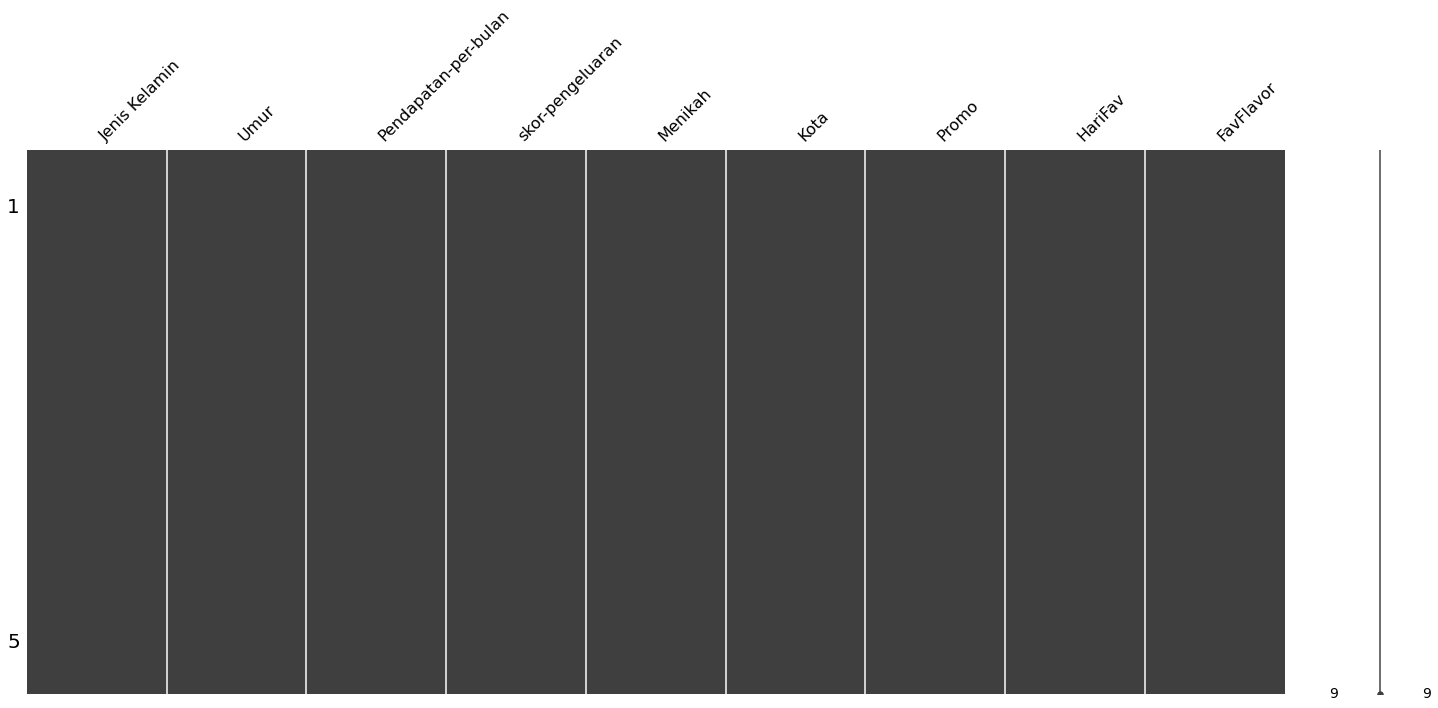

In [ ]:
msnum.matrix(df)

KASIH PENJELASANN... PADA HEATMAP DAPT DILIHAT BAHWA MISSIBG VALUE TIDAK TERSEBAR PADA SEMUA KOLOM.. Namun, perhatikan bahwa sebelumnya saat dilihat dari cuplikan data yang ada, terdapat tanda strip dimana dalam kolom tersebut ada missing values. Namun, belum terdeteksi, oleh karena itu akan ............cek website https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/

Namun, tidak semua data yang kita miliki/dapatkan, konsisten memberikan nilai NaN untuk data kosong. Contohnya ada yang berisi n/a, blank space, … (titik-titik), – (dash/double dash), dan lain-lain. Maka kita perlu melakukan data cleaning terlebih dahulu.

Sebagai contoh, kita dapat melakukan cek pada data, yaitu dengan melakukan pengecekan pada column `promo`, dengan cara berikut:


In [ ]:
print(df['Promo'])
print(df['Promo'].isnull())

0    1
1    1
2    2
3    -
4    0
Name: Promo, dtype: category
Categories (4, object): ['-', '0', '1', '2']
0    False
1    False
2    False
3    False
4    False
Name: Promo, dtype: bool


Perhatikan bahwa data yang berisikan "-" tanda strip tidak dibaca sebagai data kosong. cara yang dapat kita lakukan adalah dengan memasukkan format missing values yang tidak terbaca tersebut kedalam list, sehingga akan di anggap juga sebagai data missing seperti berikut:

In [ ]:
df['Promo']=df['Promo'].replace('-',np.NaN)#ini kalau direplace dengan 0 np.NaN nya diganti angka 0 aja #kalau mau ganti mean juga bisa cek aja disitu

sumbernya disini : https://ilmudatapy.com/menangani-missing-values/

In [ ]:
print(df['Promo'])
print(df['Promo'].isnull())

0      1
1      1
2      2
3    NaN
4      0
Name: Promo, dtype: category
Categories (3, object): ['0', '1', '2']
0    False
1    False
2    False
3     True
4    False
Name: Promo, dtype: bool


sebentar mikir dulu ini ditimpa, atau diasumsi 0 atau diapus pikirin caranya

ENAKNYA STRIPNYA DIANGGAP MISSING VALUE ATAU DIANGGAP 0 AJA YAAAA? KALO DIANGGAP 0 ITU GIMANA CARA CODINGNYAA

Lalu, kalo dihapus missing valuenya gini caranya :

In [ ]:
df_new=df.dropna()#kalau dikit ya

In [ ]:
df_new

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1,Sabtu,2
1,Wanita,32,3606557,86,1,Depok,1,Minggu,6
2,Pria,51,15983606,41,0,Tangerang,2,Minggu,3
4,Pria,36,22508196,92,1,Depok,0,Jumat,0


# Removing Duplicate Data pelajarin kalo ada duplicate data gimana

In [ ]:
#mengecek apakah ada duplikat data
print(df_new.shape)
df_new.duplicated().sum()

(5, 9)


0

In [ ]:
df_new[df_new.duplicated() == True]

In [ ]:
#menghapus entri yang memiliki data duplikat 
df_new.drop_duplicates(inplace=True)
print(df_new.duplicated().sum()) # no more duplicates
print(df_new.shape) # re-check by printing data size

## Cari Noise/Outlier??

gimana cara handling noise misal rentangnya 0-100 aja, tp ternyata engga gitu gimana ya?

gimana handling outlier multivariat? cara mengeluarkannya gimana ?

https://hub.idbigdata.com/sigit-prasetyo/panduan-praktis-penggunaan-pandas-bagian-1-39

cek modul noise tugas kemarin

In [ ]:
p = sns.boxplot(x="House_Price", y="Parking", data=price)

In [ ]:
import csv
with open('https://raw.githubusercontent.com/HanaAdzania/1/main/Case-Study-02-MixITup.csv?token=GHSAT0AAAAAABZAUUHG7RFNTPHNJMAW7NOAYZ6RBOA') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    for row in readCSV:
        print(row)

In [ ]:
# Jika anda menjalankan Jupyter notebook ini secara lokal, maka perlu penyesuaian
try:
    import google.colab; IN_COLAB = True
    !pip install openpyxl
except:
    print('Jika belum, silahkan install module openpyxl dari terminal Env anda (recommended).') #IN_COLAB = False

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
